In [10]:
#importing libraries
import re
import string
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import  tree
from sklearn.ensemble import  RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [74]:
import matplotlib.pyplot as plotter

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
#read train data with categories label to tarin models
train = pd.read_csv('./Data_Train.csv',encoding='cp1252')
test = pd.read_csv('./Data_Test.csv',encoding='cp1252')

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7628 entries, 0 to 7627
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   STORY    7628 non-null   object
 1   SECTION  7628 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.3+ KB


In [15]:
#check null values
train.isnull().sum()

STORY      0
SECTION    0
dtype: int64

In [16]:
#section column is category 
train['Category'] = train['SECTION']

In [17]:
#category notation
rem = {"Category": {0: "Politics", 1: "Technology", 2:"Entertainment", 3:"Business"}}

In [18]:
train

,STORY,SECTION,Category
0,But the most painful was the huge reversal in ...,3,3
1,How formidable is the opposition alliance amon...,0,0
2,Most Asian currencies were trading lower today...,3,3
3,"If you want to answer any question, click on ‘...",1,1
4,"In global markets, gold prices edged up today ...",3,3
...,...,...,...
7623,"Karnataka has been a Congress bastion, but it ...",0,0
7624,"The film, which also features Janhvi Kapoor, w...",2,2
7625,The database has been created after bringing t...,1,1
7626,"The state, which has had an uneasy relationshi...",0,0


In [19]:
# adding category
train = train.replace(rem)

In [20]:
train

,STORY,SECTION,Category
0,But the most painful was the huge reversal in ...,3,Business
1,How formidable is the opposition alliance amon...,0,Politics
2,Most Asian currencies were trading lower today...,3,Business
3,"If you want to answer any question, click on ‘...",1,Technology
4,"In global markets, gold prices edged up today ...",3,Business
...,...,...,...
7623,"Karnataka has been a Congress bastion, but it ...",0,Politics
7624,"The film, which also features Janhvi Kapoor, w...",2,Entertainment
7625,The database has been created after bringing t...,1,Technology
7626,"The state, which has had an uneasy relationshi...",0,Politics


In [31]:
#fake news from phase one to predict category of news
test1 = pd.read_csv('./test1.csv')

In [32]:
# modifying the test data extracted from phase one to match the columns in training data with categories
test1=test1.rename(columns={'text':'STORY'})

In [33]:
test1=test1.drop(['id','title','author','label','news'],axis=1)

In [34]:
test1

,Unnamed: 0,STORY
0,1,Russian warships ready to strike terrorists ne...
1,2,Videos #NoDAPL: Native American Leaders Vow to...
2,4,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
3,5,Trump is USA's antique hero. Clinton will be n...
4,7,You are here: Home / *Articles of the Bound* /...
...,...,...
2962,5189,11.23.2016 @4:17 PM EST More Establishment tie...
2963,5192,Earth To Ammosexuals: NRA Admits No One Is Com...
2964,5193,Public concern about faulty automobile airbags...
2965,5195,Of all the dysfunctions that plague the world’...


In [35]:
#Developing more features to train the model
train['Text_length'] = train['STORY'].apply(len)
train['words_counts']=train.STORY.str.split().map(lambda x: len(x))
train['punctuation_count'] = train['STORY'].map(lambda x: len([c for c in str(x) if c in string.punctuation]))

In [36]:
train 

,STORY,SECTION,Category,Text_length,words_counts,punctuation_count
0,But the most painful was the huge reversal in ...,3,Business,843,148,12
1,How formidable is the opposition alliance amon...,0,Politics,129,17,6
2,Most Asian currencies were trading lower today...,3,Business,386,58,31
3,"If you want to answer any question, click on ‘...",1,Technology,587,103,12
4,"In global markets, gold prices edged up today ...",3,Business,299,46,10
...,...,...,...,...,...,...
7623,"Karnataka has been a Congress bastion, but it ...",0,Politics,394,63,9
7624,"The film, which also features Janhvi Kapoor, w...",2,Entertainment,136,24,2
7625,The database has been created after bringing t...,1,Technology,484,75,10
7626,"The state, which has had an uneasy relationshi...",0,Politics,1927,308,54


In [37]:
test1.STORY

0       Russian warships ready to strike terrorists ne...
1       Videos #NoDAPL: Native American Leaders Vow to...
2       42 mins ago 1 Views 0 Comments 0 Likes 'For th...
3       Trump is USA's antique hero. Clinton will be n...
4       You are here: Home / *Articles of the Bound* /...
                              ...                        
2962    11.23.2016 @4:17 PM EST More Establishment tie...
2963    Earth To Ammosexuals: NRA Admits No One Is Com...
2964    Public concern about faulty automobile airbags...
2965    Of all the dysfunctions that plague the world’...
2966    « Previous - Next » 300 US Marines To Be Deplo...
Name: STORY, Length: 2967, dtype: object

In [38]:
train.STORY

0       But the most painful was the huge reversal in ...
1       How formidable is the opposition alliance amon...
2       Most Asian currencies were trading lower today...
3       If you want to answer any question, click on ‘...
4       In global markets, gold prices edged up today ...
                              ...                        
7623    Karnataka has been a Congress bastion, but it ...
7624    The film, which also features Janhvi Kapoor, w...
7625    The database has been created after bringing t...
7626    The state, which has had an uneasy relationshi...
7627    Virus stars Kunchacko Boban, Tovino Thomas, In...
Name: STORY, Length: 7628, dtype: object

In [39]:
#data cleaning
def clean_text(text):
    text = text.lower()                                  # lower-case all characters
    text =  re.sub(r'@\S+', '',text)                     # remove twitter handles
    text =  re.sub(r'http\S+', '',text)                  # remove urls
    text =  re.sub(r'pic.\S+', '',text) 
    text =  re.sub(r"[^a-zA-Z+']", ' ',text)             # only keeps characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')      # keep words with length>1 only
    text = text.lower()
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.tokenize.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')   # remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i)>2])
    text= re.sub("\s[\s]+", " ",text).strip()            # remove repeated/leading/trailing spaces
    return text

In [40]:
train.STORY = train.STORY.apply(clean_text)

In [41]:
train.dtypes

STORY                object
SECTION               int64
Category             object
Text_length           int64
words_counts          int64
punctuation_count     int64
dtype: object

In [42]:
test1.dtypes

Unnamed: 0     int64
STORY         object
dtype: object

In [43]:
train.shape

(7628, 6)

In [44]:
test1.shape

(2967, 2)

In [45]:
#Adding features
test1['Text_length'] = test1['STORY'].apply(len)
test1['words_counts']=test1.STORY.str.split().map(lambda x: len(x))
test1['punctuation_count'] = test1['STORY'].map(lambda x: len([c for c in str(x) if c in string.punctuation]))

In [46]:
test['Text_length'] = test['STORY'].apply(len)
test['words_counts']=test.STORY.str.split().map(lambda x: len(x))
test['punctuation_count'] = test['STORY'].map(lambda x: len([c for c in str(x) if c in string.punctuation]))

In [47]:
test1.STORY = test1.STORY.apply(clean_text)

In [48]:
test.STORY = test.STORY.apply(clean_text)

In [49]:
test1.STORY = test1.STORY.astype(str)

In [50]:
test1.Text_length=test1.STORY.apply(len)

In [51]:
train.Text_length=train.STORY.apply(len)
train.head()

,STORY,SECTION,Category,Text_length,words_counts,punctuation_count
0,painful huge reversal fee income unheard among...,3,Business,573,148,12
1,formidable opposition alliance among congress ...,0,Politics,108,17,6
2,asian currencies trading lower today south kor...,3,Business,230,58,31
3,want answer question click answer clicking ans...,1,Technology,360,103,12
4,global markets gold prices edged today disappo...,3,Business,247,46,10


In [52]:
#Vectorisation
vectorizer = TfidfVectorizer()
data_vectorizer = vectorizer.fit_transform(train['STORY'])
test1_vector = vectorizer.transform(test1['STORY'])
test_vector = vectorizer.transform(test['STORY'])

In [53]:
test_vector.shape

(2748, 30696)

In [54]:
test1_vector.shape

(2967, 30696)

In [55]:
data_vectorizer.shape

(7628, 30696)

In [56]:
label = train['SECTION']

In [57]:
#Test train split to evaluate performance of models
X_train, X_test, y_train, y_test = train_test_split(data_vectorizer, label, test_size=0.2, random_state=42)

In [120]:
def model(name_model):
    a = name_model()
    a.fit(X_train,y_train)
    y_pred = a.predict(X_test)
    original = a.predict(test_vector)
    output = a.predict(test1_vector)
    Acc_train = a.score(X_train, y_train)
    acc_test = a.score(X_test, y_test)
    print('Train Accuracy : {:.2f}%'.format(Acc_train*100))
    print('Test Accuracy  : {:.2f}%'.format(acc_test*100))
    print('******** Classification Report ***************')
    print(classification_report(y_test, y_pred,target_names=my_Category))

In [58]:
rfclassifier = RandomForestClassifier(n_estimators=500)

In [59]:
rfclasssifier_train = rfclassifier.fit(X_train,y_train)

In [60]:
y_pred = rfclassifier.predict(X_test)

In [61]:
Acc_train = rfclassifier.score(X_train, y_train)
acc_test = rfclassifier.score(X_test, y_test)

In [66]:
my_Category =['Politics','Technology','Entertainment','Business']

In [67]:
print('Train Accuracy : {:.2f}%'.format(Acc_train*100))
print('Test Accuracy  : {:.2f}%'.format(acc_test*100))
print(classification_report(y_test, y_pred,target_names=my_Category))
print('******** Classification Report ***************')

Train Accuracy : 99.77%
Test Accuracy  : 95.15%
               precision    recall  f1-score   support

     Politics       0.96      0.92      0.94       323
   Technology       0.95      0.96      0.96       549
Entertainment       0.94      0.97      0.95       402
     Business       0.96      0.93      0.95       252

     accuracy                           0.95      1526
    macro avg       0.95      0.95      0.95      1526
 weighted avg       0.95      0.95      0.95      1526

******** Classification Report ***************


In [68]:
output = rfclassifier.predict(test1_vector)

In [69]:
output

array([1, 1, 2, ..., 1, 2, 0])

In [70]:
#function to group the output generated by multiclassification to get the categories
def group_list(lst):
      
    res =  [(el, lst.count(el)) for el in lst]
    return list(OrderedDict(res).items())

In [71]:
from collections import OrderedDict

In [72]:
lst = output.tolist()

In [81]:
b=group_list(lst)

In [83]:
b

[(1, 978), (2, 848), (0, 1067), (3, 74)]

In [107]:
labels = []
Articles =[]

In [ ]:
rem = {"Category": {0: "Politics", 1: "Technology", 2:"Entertainment", 3:"Business"}}

In [108]:
for x,y in b:
  if x==1:
    labels.append("Technology")
  if x==0:
    labels.append("Politics")
  if x==2:
    labels.append("Entertainment")
  if x==3:
    labels.append("Business")
  Articles.append(y)

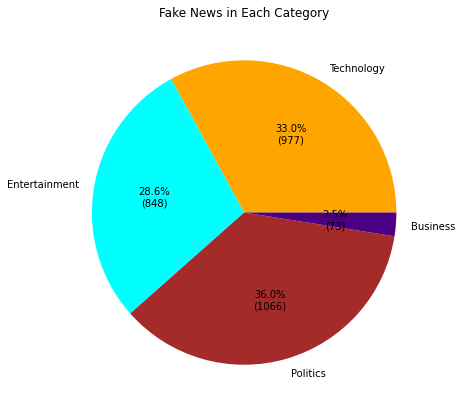

In [118]:
colors = ( "orange", "cyan", "brown","indigo")
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
fig, ax = plt.subplots(figsize =(10, 7))
ax.set_title("Fake News in Each Category")
ax.pie(Articles,autopct = lambda pct: func(pct, Articles),labels = labels,colors = colors)
plt.show()


In [121]:
from sklearn.linear_model import LogisticRegression
model(LogisticRegression)

Train Accuracy : 98.92%
Test Accuracy  : 96.33%
******** Classification Report ***************
               precision    recall  f1-score   support

     Politics       0.97      0.93      0.95       323
   Technology       0.97      0.97      0.97       549
Entertainment       0.94      0.98      0.96       402
     Business       0.96      0.96      0.96       252

     accuracy                           0.96      1526
    macro avg       0.96      0.96      0.96      1526
 weighted avg       0.96      0.96      0.96      1526



In [122]:
group_list(output.tolist())

[(1, 978), (2, 848), (0, 1067), (3, 74)]

In [123]:
from sklearn.ensemble import AdaBoostClassifier
model(AdaBoostClassifier)

Train Accuracy : 87.20%
Test Accuracy  : 86.44%
******** Classification Report ***************
               precision    recall  f1-score   support

     Politics       0.94      0.86      0.90       323
   Technology       0.92      0.81      0.86       549
Entertainment       0.76      0.95      0.84       402
     Business       0.88      0.86      0.87       252

     accuracy                           0.86      1526
    macro avg       0.87      0.87      0.87      1526
 weighted avg       0.88      0.86      0.87      1526



In [124]:
group_list(output.tolist())

[(1, 978), (2, 848), (0, 1067), (3, 74)]